<a href="https://colab.research.google.com/github/Phuc182219/learn_to_use_colab/blob/main/Ch%E1%BB%A9ng_kho%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Giao dịch dùng các chỉ số kĩ thuật**

In [ ]:
!pip install vnstock


In [ ]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=d97b6dfa8069a1c12b2eb2489af547ec072d855e40f4ea7f78c67e2ca5840897
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=c17080a21b569dfc8856f19183f0eeffb398cc93202cbab3a0457b69294a4c71
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
from vnstock import *
import pandas as pd
import pandas_ta as ta
# Nhập ticker đã lọc vào symbol, điều chỉnh start_(end)date
# Ví dụ: Nhập cổ phiếu "MWG"
df= stock_historical_data(symbol="MWG", start_date="2024-01-01", end_date="2024-04-12", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
df['time']=pd.to_datetime(df['time'],format="%m/%d/%Y")
df=df[df.high!=df.low]
df.set_index("time", inplace=True)
df

,open,high,low,close,volume,ticker
time,,,,,,
2024-01-02,43100,43300,42150,42450,7140400,MWG
2024-01-03,42400,43450,42000,43200,6083900,MWG
2024-01-04,43200,43800,43000,43200,8516100,MWG
2024-01-05,43200,44100,43000,43850,9042100,MWG
2024-01-08,44300,44300,43200,43200,6213200,MWG
...,...,...,...,...,...,...
2024-04-08,51000,51000,49800,50000,6085000,MWG
2024-04-09,50000,53100,49800,52800,19487100,MWG
2024-04-10,52900,53200,51700,52000,10159900,MWG


In [ ]:
df["EMA"]=ta.ema(df.close, length=12)
df["SMA"]=ta.sma(df.close, length=5)
my_bbands = ta.bbands(df.close, length=7, std=1.2)
df=df.join(my_bbands)
df

,open,high,low,close,volume,ticker,EMA,SMA,BBL_7_1.2,BBM_7_1.2,BBU_7_1.2,BBB_7_1.2,BBP_7_1.2
time,,,,,,,,,,,,,
2024-01-02,43100,43300,42150,42450,7140400,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,42400,43450,42000,43200,6083900,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-04,43200,43800,43000,43200,8516100,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-05,43200,44100,43000,43850,9042100,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-08,44300,44300,43200,43200,6213200,MWG,NaN,43180.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08,51000,51000,49800,50000,6085000,MWG,50096.758586,50700.0,50197.198518,50857.142857,51517.087196,2.595287,-0.149405
2024-04-09,50000,53100,49800,52800,19487100,MWG,50512.641881,50940.0,50044.077925,51100.000000,52155.922075,4.132767,1.304984
2024-04-10,52900,53200,51700,52000,10159900,MWG,50741.466207,51300.0,50066.560086,51185.714286,52304.868485,4.372916,0.863795


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
def ma_signal(df, current_candle, backcandles):
    df_slice = df.reset_index().copy()
    # Rà hết vùng nến từ đầu đến cuối
    start = max(0, current_candle - backcandles)
    end = current_candle
    relevant_rows = df_slice.iloc[start:end]

    # Nếu tất cả SMA ớ dưới EMA, đề xuất lệnh bán
    if all(relevant_rows["SMA"] < relevant_rows["EMA"]):
        return 1  # bán
    # Nếu tất cả SMA ở trên EMA, đề xuất lệnh mua
    elif all(relevant_rows["SMA"] > relevant_rows["EMA"]):
        return 2  # mua
    else:
        return 0
df.reset_index(inplace=True)
df['MA_Signal'] = df.apply(lambda row: ma_signal(df, row.name, 2) , axis=1)
df

,time,open,high,low,close,volume,ticker,EMA,SMA,BBL_7_1.2,BBM_7_1.2,BBU_7_1.2,BBB_7_1.2,BBP_7_1.2,MA_Signal
0,2024-01-02,43100,43300,42150,42450,7140400,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2024-01-03,42400,43450,42000,43200,6083900,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2024-01-04,43200,43800,43000,43200,8516100,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2024-01-05,43200,44100,43000,43850,9042100,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2024-01-08,44300,44300,43200,43200,6213200,MWG,NaN,43180.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2024-04-08,51000,51000,49800,50000,6085000,MWG,50096.758586,50700.0,50197.198518,50857.142857,51517.087196,2.595287,-0.149405,2
65,2024-04-09,50000,53100,49800,52800,19487100,MWG,50512.641881,50940.0,50044.077925,51100.000000,52155.922075,4.132767,1.304984,2
66,2024-04-10,52900,53200,51700,52000,10159900,MWG,50741.466207,51300.0,50066.560086,51185.714286,52304.868485,4.372916,0.863795,2
67,2024-04-11,51200,52800,51200,52300,6968900,MWG,50981.240636,51620.0,50078.146313,51285.714286,52493.282258,4.709179,0.919970,2


In [ ]:
def bol_signal(df, current_candle):
    if df.close[current_candle]>=df['BBU_7_1.2'][current_candle]:
        return 1 #bán
    elif df.close[current_candle]<=df['BBL_7_1.2'][current_candle]:
        return 2 #mua
df['Bol_Signal'] = df.apply(lambda row: bol_signal(df, row.name), axis=1)

In [ ]:
df[df["Bol_Signal"]!=0]

,time,open,high,low,close,volume,ticker,EMA,SMA,BBL_7_1.2,BBM_7_1.2,BBU_7_1.2,BBB_7_1.2,BBP_7_1.2,MA_Signal,Bol_Signal
0,2024-01-02,43100,43300,42150,42450,7140400,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,2024-01-03,42400,43450,42000,43200,6083900,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2024-01-04,43200,43800,43000,43200,8516100,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2024-01-05,43200,44100,43000,43850,9042100,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2024-01-08,44300,44300,43200,43200,6213200,MWG,NaN,43180.0,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2024-04-08,51000,51000,49800,50000,6085000,MWG,50096.758586,50700.0,50197.198518,50857.142857,51517.087196,2.595287,-0.149405,2,2.0
65,2024-04-09,50000,53100,49800,52800,19487100,MWG,50512.641881,50940.0,50044.077925,51100.000000,52155.922075,4.132767,1.304984,2,1.0
66,2024-04-10,52900,53200,51700,52000,10159900,MWG,50741.466207,51300.0,50066.560086,51185.714286,52304.868485,4.372916,0.863795,2,NaN
67,2024-04-11,51200,52800,51200,52300,6968900,MWG,50981.240636,51620.0,50078.146313,51285.714286,52493.282258,4.709179,0.919970,2,NaN


In [ ]:
import numpy as np
def pointpos(x):
    if x['MA_Signal']==2 or  x['Bol_Signal']==2:
        return x['low']-1e-3
    elif x['MA_Signal']==1 or x['Bol_Signal']==1:
        return x['high']+1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=1
dfpl = df[st:st+35]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close']),

                go.Scatter(x=dfpl.index, y=dfpl['BBL_7_1.2'],
                           line=dict(color='green', width=1),
                           name="BBL"),
                go.Scatter(x=dfpl.index, y=dfpl['BBU_7_1.2'],
                           line=dict(color='green', width=1),
                           name="BBU"),
                go.Scatter(x=dfpl.index, y=dfpl['SMA'],
                           line=dict(color='black', width=1),
                           name="SMA"),
                go.Scatter(x=dfpl.index, y=dfpl['EMA'],
                           line=dict(color='blue', width=1),
                           name="EMA")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="entry")

fig.show()

In [ ]:
df.head(50)

,time,open,high,low,close,volume,ticker,EMA,SMA,BBL_7_1.2,BBM_7_1.2,BBU_7_1.2,BBB_7_1.2,BBP_7_1.2,MA_Signal,Bol_Signal,pointpos
0,2024-01-02,43100,43300,42150,42450,7140400,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,43300.001
1,2024-01-03,42400,43450,42000,43200,6083900,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2024-01-04,43200,43800,43000,43200,8516100,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2024-01-05,43200,44100,43000,43850,9042100,MWG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2024-01-08,44300,44300,43200,43200,6213200,MWG,NaN,43180.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5,2024-01-09,43150,43200,42400,42700,9017100,MWG,NaN,43230.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
6,2024-01-10,42700,42900,41900,42250,6770700,MWG,NaN,43040.0,42371.027024,42978.571429,43586.115834,2.827197,-0.099603,0,2.0,41899.999
7,2024-01-11,42250,43150,42200,42450,4992900,MWG,NaN,42890.0,42371.027024,42978.571429,43586.115834,2.827197,0.064994,0,NaN,NaN
8,2024-01-12,41850,42600,41800,41900,7139700,MWG,NaN,42500.0,42052.134936,42792.857143,43533.579350,3.461896,-0.102694,0,2.0,41799.999
9,2024-01-15,42550,43300,42250,42900,8986100,MWG,NaN,42440.0,42032.862834,42750.000000,43467.137166,3.355028,0.604583,0,NaN,NaN


In [ ]:
from backtesting import Strategy
from backtesting import Backtest
df.index=pd.to_datetime(df['time'],format='%Y/%m/%d')
df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})
class MyStrat(Strategy):

    def init(self):
        pass
    def next(self):
        if self.data.MA_Signal == 2 or self.data.Bol_Signal == 2:
            if len(self.trades)== 0:
                self.buy()
        if self.data.MA_Signal== 1 or self.data.Bol_Signal == 1:
            self.position.close()
bt = Backtest(df, MyStrat, cash=10000000)
bt.run()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.



Start                     2024-01-02 00:00:00
End                       2024-04-12 00:00:00
Duration                    101 days 00:00:00
Exposure Time [%]                    78.26087
Equity Final [$]                   11226350.0
Equity Peak [$]                    11226350.0
Return [%]                            12.2635
Buy & Hold Return [%]               22.497055
Return (Ann.) [%]                   52.573821
Volatility (Ann.) [%]               42.172994
Sharpe Ratio                         1.246623
Sortino Ratio                        3.259033
Calmar Ratio                         6.875853
Max. Drawdown [%]                   -7.646152
Avg. Drawdown [%]                   -3.204418
Max. Drawdown Duration       55 days 00:00:00
Avg. Drawdown Duration       16 days 00:00:00
# Trades                                    8
Win Rate [%]                             75.0
Best Trade [%]                       4.852071
Worst Trade [%]                     -1.171459
Avg. Trade [%]                    

In [ ]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1305', ...)

# Backtest sàn HOSE

In [ ]:
#Nhập thư viện
from vnstock import *
import pandas as pd
import pandas_ta as ta
from backtesting import Strategy
from backtesting import Backtest
from backtesting.lib import crossover
import warnings
from vnstock import stock_screening_insights
#Chặn warnings sharp ratio cho những cổ phiếu có returns = 0%
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Lọc cổ phiếu
list = []
listhold = []
params = {
    "exchangeName": "HOSE",
    "avgTradingValue5Day":(100,500000),
    "marketCap": (100,500000),

}
data = stock_screening_insights(params, size=50)
#Set up và backtest hàng loạt
for i in data['ticker']:
    df= stock_historical_data(symbol=i, start_date="2024-03-01", end_date="2024-04-12"
                              , resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
    df['time']=pd.to_datetime(df['time'],format="%m/%d/%Y")
    df=df[df.high!=df.low]
    df.set_index("time", inplace=True)
    df["EMA"]=ta.ema(df.close, length=12)
    df["SMA"]=ta.sma(df.close, length=5)
    my_bbands = ta.bbands(df.close, length=7, std=1.2)
    df=df.join(my_bbands)
    pd.options.mode.chained_assignment = None
    def ema_signal(df, current_candle, backcandles):
        df_slice = df.reset_index().copy()
        # Rà hết vùng nến từ đầu đến cuối
        start = max(0, current_candle - backcandles)
        end = current_candle
        relevant_rows = df_slice.iloc[start:end]

        # Nếu tất cả EMA_fast ớ dưới EMA_slow, đề xuất lệnh bán
        if all(relevant_rows["SMA"] < relevant_rows["EMA"]):
            return 1  # bán
        # Nếu tất cả EMA_fast ớ dưới EMA_slow, đề xuất lệnh bán
        elif all(relevant_rows["SMA"] > relevant_rows["EMA"]):
            return 2  # mua
        else:
            return 0

    #df=df[-10000:-1]
    df.reset_index(inplace=True)
    df['MA_Signal'] = df.apply(lambda row: ema_signal(df, row.name, 2) , axis=1)
    def bol_signal(df, current_candle):
        if df.close[current_candle]>=df['BBU_7_1.2'][current_candle]:
            return 1 #bán
        elif df.close[current_candle]<=df['BBL_7_1.2'][current_candle]:
            return 2 #mua
    df['Bol_Signal'] = df.apply(lambda row: bol_signal(df, row.name), axis=1)
    df.index=pd.to_datetime(df['time'],format='%Y/%m/%d')
    df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})
    class MyStrat(Strategy):

        def init(self):
            pass
        def next(self):
            if self.data.MA_Signal == 2 or self.data.Bol_Signal == 2:
                if len(self.trades)== 0:
                    self.buy()
            if self.data.MA_Signal== 1 or self.data.Bol_Signal == 1:
                self.position.close()
    bt = Backtest(df, MyStrat, cash=10000000)
    run = bt.run()
    print(i, f"Lợi nhuận: {round(run['Return [%]'],2)}%") #,run['Buy & Hold Return [%]'])
    list.append(run['Return [%]'])
    #listhold.append(run['Buy & Hold Return [%]'])
print(f'Tổng lợi nhuận: {sum(list)}%')
#print(sum(listhold))


ACB Lợi nhuận: -0.12%
BAF Lợi nhuận: -5.4%
CII Lợi nhuận: 3.26%
CMG Lợi nhuận: 10.22%
CTD Lợi nhuận: 0.86%
CTG Lợi nhuận: -3.49%
DBC Lợi nhuận: 0.16%
DCM Lợi nhuận: -0.13%
DGC Lợi nhuận: -2.1%
DGW Lợi nhuận: -1.29%
DIG Lợi nhuận: 14.89%
DPM Lợi nhuận: -0.07%
DXG Lợi nhuận: 17.48%
EIB Lợi nhuận: -2.16%
EVF Lợi nhuận: -0.76%
FPT Lợi nhuận: -1.14%
FRT Lợi nhuận: -3.73%
FTS Lợi nhuận: 1.62%
GAS Lợi nhuận: -2.93%
GEX Lợi nhuận: 7.42%
GMD Lợi nhuận: 10.0%
GVR Lợi nhuận: -0.5%
HAG Lợi nhuận: 14.65%
HAH Lợi nhuận: -5.31%
HCM Lợi nhuận: 0.08%
HDB Lợi nhuận: -1.31%
HDC Lợi nhuận: 4.12%
HDG Lợi nhuận: -1.58%
HPG Lợi nhuận: -0.86%
HSG Lợi nhuận: -0.51%
HVN Lợi nhuận: 16.51%
KBC Lợi nhuận: 5.52%
KDH Lợi nhuận: -3.42%
LPB Lợi nhuận: 10.45%
MBB Lợi nhuận: 1.92%
MSN Lợi nhuận: -2.14%
MWG Lợi nhuận: 10.89%
NKG Lợi nhuận: 5.16%
NLG Lợi nhuận: -1.15%
NVL Lợi nhuận: 9.12%
PC1 Lợi nhuận: 2.69%
PDR Lợi nhuận: 7.42%
PLX Lợi nhuận: -1.64%
PNJ Lợi nhuận: 6.2%
POW Lợi nhuận: -0.44%
PVD Lợi nhuận: 5.52%
PVT Lợi 

# Backtest sàn HNX

In [ ]:
#Nhập thư viện
from vnstock import *
import pandas as pd
import pandas_ta as ta
from backtesting import Strategy
from backtesting import Backtest
from backtesting.lib import crossover
import warnings
from vnstock import stock_screening_insights
#Chặn warnings sharp ratio cho những cổ phiếu có returns = 0%
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Lọc cổ phiếu
list = []
listhold = []
params = {
    "exchangeName": "HNX",
    "avgTradingValue5Day":(10,5000),
    "marketCap": (100,500000),
}
data = stock_screening_insights(params, size=50)
#Set up và backtest hàng loạt
for i in data['ticker']:
    df= stock_historical_data(symbol=i, start_date="2024-03-01", end_date="2024-04-12", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
    df['time']=pd.to_datetime(df['time'],format="%m/%d/%Y")
    df=df[df.high!=df.low]
    df.set_index("time", inplace=True)
    df["EMA"]=ta.ema(df.close, length=12)
    df["SMA"]=ta.sma(df.close, length=5)
    my_bbands = ta.bbands(df.close, length=7, std=1.2)
    df=df.join(my_bbands)
    pd.options.mode.chained_assignment = None
    def ema_signal(df, current_candle, backcandles):
        df_slice = df.reset_index().copy()
        # Rà hết vùng nến từ đầu đến cuối
        start = max(0, current_candle - backcandles)
        end = current_candle
        relevant_rows = df_slice.iloc[start:end]

        # Nếu tất cả EMA_fast ớ dưới EMA_slow, đề xuất lệnh bán
        if all(relevant_rows["SMA"] < relevant_rows["EMA"]):
            return 1  # bán
        # Nếu tất cả EMA_fast ớ dưới EMA_slow, đề xuất lệnh bán
        elif all(relevant_rows["SMA"] > relevant_rows["EMA"]):
            return 2  # mua
        else:
            return 0

    #df=df[-10000:-1]
    df.reset_index(inplace=True)
    df['MA_Signal'] = df.apply(lambda row: ema_signal(df, row.name, 2) , axis=1)
    def bol_signal(df, current_candle):
        if df.close[current_candle]>=df['BBU_7_1.2'][current_candle]:
            return 1 #bán
        elif df.close[current_candle]<=df['BBL_7_1.2'][current_candle]:
            return 2 #mua
    df['Bol_Signal'] = df.apply(lambda row: bol_signal(df, row.name), axis=1)
    df.index=pd.to_datetime(df['time'],format='%Y/%m/%d')
    df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})
    class MyStrat(Strategy):

        def init(self):
            pass
        def next(self):
            if self.data.MA_Signal == 2 or self.data.Bol_Signal == 2:
                if len(self.trades)== 0:
                    self.buy()
            if self.data.MA_Signal== 1 or self.data.Bol_Signal == 1:
                self.position.close()
bt = Backtest(df, MyStrat, cash=10000000)
run = bt.run()
print(i,f'Lợi nhuận: {round(run["Return [%]"],2)}%, {run["Buy & Hold Return [%]"]}')
list.append(run["Return [%]"])
#listhold.append(run['Buy & Hold Return [%]'])
print(f'Tổng lợi nhuận: {sum(list)}%')
#print(sum(listhold))

VGS Lợi nhuận: 3.9%, 11.244979919678714
Tổng lợi nhuận: 3.8989999999999996%


# Backtest sàn UPCOM

In [ ]:
#Nhập thư viện
from vnstock import *
import pandas as pd
import pandas_ta as ta
from backtesting import Strategy
from backtesting import Backtest
from backtesting.lib import crossover
import warnings
from vnstock import stock_screening_insights
#Chặn warnings sharp ratio cho những cổ phiếu có returns = 0%
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Lọc cổ phiếu
list = []
listhold = []
params = {
    "exchangeName": "UPCOM",
    "avgTradingValue5Day":(5,1000),
    "marketCap": (100,500000),
}
data = stock_screening_insights(params, size=50)
#Set up và backtest hàng loạt
for i in data['ticker']:
    df= stock_historical_data(symbol=i, start_date="2024-03-01", end_date="2024-04-12", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
    df['time']=pd.to_datetime(df['time'],format="%m/%d/%Y")
    df=df[df.high!=df.low]
    df.set_index("time", inplace=True)
    df["EMA"]=ta.ema(df.close, length=12)
    df["SMA"]=ta.sma(df.close, length=5)
    my_bbands = ta.bbands(df.close, length=7, std=1.2)
    df=df.join(my_bbands)
    pd.options.mode.chained_assignment = None
    def ema_signal(df, current_candle, backcandles):
        df_slice = df.reset_index().copy()
        # Rà hết vùng nến từ đầu đến cuối
        start = max(0, current_candle - backcandles)
        end = current_candle
        relevant_rows = df_slice.iloc[start:end]

        # Nếu tất cả EMA_fast ớ dưới EMA_slow, đề xuất lệnh bán
        if all(relevant_rows["SMA"] < relevant_rows["EMA"]):
            return 1  # bán
        # Nếu tất cả EMA_fast ớ dưới EMA_slow, đề xuất lệnh bán
        elif all(relevant_rows["SMA"] > relevant_rows["EMA"]):
            return 2  # mua
        else:
            return 0

    #df=df[-10000:-1]
    df.reset_index(inplace=True)
    df['MA_Signal'] = df.apply(lambda row: ema_signal(df, row.name, 2) , axis=1)
    def bol_signal(df, current_candle):
        if df.close[current_candle]>=df['BBU_7_1.2'][current_candle]:
            return 1 #bán
        elif df.close[current_candle]<=df['BBL_7_1.2'][current_candle]:
            return 2 #mua
    df['Bol_Signal'] = df.apply(lambda row: bol_signal(df, row.name), axis=1)
    df.index=pd.to_datetime(df['time'],format='%Y/%m/%d')
    df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})
    class MyStrat(Strategy):

        def init(self):
            pass
        def next(self):
            if self.data.MA_Signal == 2 or self.data.Bol_Signal == 2:
                if len(self.trades)== 0:
                    self.buy()
            if self.data.MA_Signal== 1 or self.data.Bol_Signal == 1:
                self.position.close()
bt = Backtest(df, MyStrat, cash=10000000)
run = bt.run()
print(i, f'Lợi nhuận: {round(run["Return [%]"],2)}%')  # ,run['Buy & Hold Return [%]'])
list.append(run["Return [%]"])
# listhold.append(run['Buy & Hold Return [%]'])
print(f'Tổng lợi nhuận: {sum(list)}%')
#print(sum(listhold))

VTP Lợi nhuận: -10.13%
Tổng lợi nhuận: -10.134%


# **2.Giao dịch dùng các mô hình trí tuệ nhân tạo**

**1. Chuẩn bị dữ liệu**

In [ ]:
import pandas as pd
import pandas_ta as ta
from vnstock import stock_historical_data
from datetime import datetime

# Ví dụ: Nhập cổ phiếu "MWG"
df = stock_historical_data(symbol="MWG", start_date="2022-01-01", end_date="2024-04-12", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d")  # Chỉnh sửa định dạng ngày
df = df[df['high'] != df['low']]
df.set_index("time", inplace=True)

# Đổi tên các cột cho đúng định dạng yêu cầu của backtesting library
df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})

# Thêm các chỉ báo kỹ thuật
df["EMA"] = ta.ema(df['Close'], length=12)
df["SMA"] = ta.sma(df['Close'], length=5)
my_bbands = ta.bbands(df['Close'], length=7, std=1.2)
df = df.join(my_bbands)

df = df.dropna()

# Chuẩn bị dữ liệu
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df = df.dropna()

features = ['EMA', 'SMA', 'BBL_7_1.2', 'BBU_7_1.2']
X = df[features]
y = df['target']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





**2. Xây dựng Mô hình AI**

2.1. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

# Xây dựng mô hình Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
print(f"Logistic Regression Model Accuracy: {lr_model.score(X_test_scaled, y_test)}")


Logistic Regression Model Accuracy: 0.48214285714285715


2.2. RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Xây dựng mô hình RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=43)
rf_model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
print(f"RandomForest Model Accuracy: {rf_model.score(X_test_scaled, y_test)}")


RandomForest Model Accuracy: 0.48214285714285715


2.3. GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Xây dựng mô hình GradientBoosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
print(f"GradientBoosting Model Accuracy: {gb_model.score(X_test_scaled, y_test)}")


GradientBoosting Model Accuracy: 0.44642857142857145


2.4. Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Xây dựng mô hình Mạng nơ-ron với nhiều tầng và Dropout
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))  # Thêm Dropout để tránh overfitting
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))  # Thêm Dropout để tránh overfitting
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Điều chỉnh learning rate và biên dịch mô hình
optimizer = Adam(learning_rate=0.001)
nn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Huấn luyện mô hình
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Đánh giá mô hình
_, accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Model Accuracy: {accuracy}")




Epoch 1/100
45/45 [==============================] - 2s 4ms/step - loss: 0.7011 - accuracy: 0.4586
Epoch 2/100
45/45 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5503
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5324
Epoch 4/100
45/45 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5347
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.5123
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5257
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5347
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5168
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5347
Epoch 10/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5145
Epoch 11/

3. Áp dụng Mô hình vào Giao dịch.

*   


Chúng ta sẽ áp dụng từng mô hình để đưa ra quyết định giao dịch và đánh giá kết quả.

3.1. RandomForest Strategy

In [ ]:
# Dự đoán tín hiệu với RandomForest
df['rf_prediction'] = rf_model.predict(scaler.transform(X))

# Xây dựng chiến lược giao dịch dựa trên tín hiệu dự đoán của RandomForest
class RF_Strategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.rf_prediction, name='rf_signal')

    def next(self):
        if self.signal[-1] == 1:  # Sử dụng giá trị cuối cùng của tín hiệu
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0 and self.position:
            self.position.close()

bt_rf = Backtest(df, RF_Strategy, cash=10000000)
results_rf = bt_rf.run()
print(results_rf)
bt_rf.plot()




Start                     2022-01-19 00:00:00
End                       2024-04-12 00:00:00
Duration                    814 days 00:00:00
Exposure Time [%]                   66.905188
Equity Final [$]                  373426192.0
Equity Peak [$]                   376996192.0
Return [%]                         3634.26192
Buy & Hold Return [%]              -20.840311
Return (Ann.) [%]                  415.919592
Volatility (Ann.) [%]              136.769141
Sharpe Ratio                         3.041034
Sortino Ratio                       41.125683
Calmar Ratio                         54.32228
Max. Drawdown [%]                   -7.656519
Avg. Drawdown [%]                   -1.766909
Max. Drawdown Duration       31 days 00:00:00
Avg. Drawdown Duration        9 days 00:00:00
# Trades                                  121
Win Rate [%]                        82.644628
Best Trade [%]                      19.020338
Worst Trade [%]                      -3.23331
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p4345', ...)

3.2. GradientBoosting Strategy

In [ ]:
# Dự đoán tín hiệu với GradientBoosting
df['gb_prediction'] = gb_model.predict(scaler.transform(X))

# Xây dựng chiến lược giao dịch dựa trên tín hiệu dự đoán của GradientBoosting
class GB_Strategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.gb_prediction, name='gb_signal')

    def next(self):
        if self.signal[-1] == 1:  # Sử dụng giá trị cuối cùng của tín hiệu
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0 and self.position:
            self.position.close()

bt_gb = Backtest(df, GB_Strategy, cash=10000000)
results_gb = bt_gb.run()
print(results_gb)
bt_gb.plot()



Start                     2022-01-19 00:00:00
End                       2024-04-12 00:00:00
Duration                    814 days 00:00:00
Exposure Time [%]                   55.992844
Equity Final [$]                  169698776.0
Equity Peak [$]                   170045076.0
Return [%]                         1596.98776
Buy & Hold Return [%]              -20.840311
Return (Ann.) [%]                  260.858046
Volatility (Ann.) [%]               93.114431
Sharpe Ratio                         2.801478
Sortino Ratio                       23.103915
Calmar Ratio                        28.480668
Max. Drawdown [%]                   -9.159127
Avg. Drawdown [%]                   -2.518502
Max. Drawdown Duration       31 days 00:00:00
Avg. Drawdown Duration       12 days 00:00:00
# Trades                                   95
Win Rate [%]                        83.157895
Best Trade [%]                      19.844044
Worst Trade [%]                     -7.687232
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p4725', ...)

3.3. Neural Network Strategy

In [ ]:
# Dự đoán tín hiệu với mô hình Neural Network
df['nn_improved_prediction'] = (nn_model.predict(scaler.transform(X)) > 0.5).astype(int)

# Xây dựng chiến lược giao dịch dựa trên tín hiệu dự đoán của Neural Network
class NN_Improved_Strategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.nn_improved_prediction, name='nn_signal')

    def next(self):
        if self.signal[-1] == 1:  # Sử dụng giá trị cuối cùng của tín hiệu
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0 and self.position:
            self.position.close()

bt_nn_improved = Backtest(df, NN_Improved_Strategy, cash=10000000)
results_nn_improved = bt_nn_improved.run()
print(results_nn_improved)
bt_nn_improved.plot()


18/18 [==============================] - 1s 7ms/step
Start                     2022-01-19 00:00:00
End                       2024-04-12 00:00:00
Duration                    814 days 00:00:00
Exposure Time [%]                   19.856887
Equity Final [$]                   17360220.0
Equity Peak [$]                    17566220.0
Return [%]                            73.6022
Buy & Hold Return [%]              -20.840311
Return (Ann.) [%]                   28.403065
Volatility (Ann.) [%]               24.977513
Sharpe Ratio                         1.137145
Sortino Ratio                        2.855292
Calmar Ratio                          2.66101
Max. Drawdown [%]                   -10.67379
Avg. Drawdown [%]                   -4.029024
Max. Drawdown Duration      179 days 00:00:00
Avg. Drawdown Duration       36 days 00:00:00
# Trades                                    6
Win Rate [%]                        83.333333
Best Trade [%]                      29.934116
Worst Trade [%]            

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p5865', ...)

3.4 Logistic Regression Strategy

In [ ]:
# Dự đoán tín hiệu với Logistic Regression
df['lr_prediction'] = lr_model.predict(scaler.transform(X))

# Xây dựng chiến lược giao dịch dựa trên tín hiệu dự đoán của Logistic Regression
from backtesting import Strategy, Backtest

class LR_Strategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.lr_prediction, name='lr_signal')

    def next(self):
        if self.signal[-1] == 1:  # Sử dụng giá trị cuối cùng của tín hiệu
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0 and self.position:
            self.position.close()

bt_lr = Backtest(df, LR_Strategy, cash=10000000)
results_lr = bt_lr.run()
print(results_lr)
bt_lr.plot()

Start                     2022-01-19 00:00:00
End                       2024-04-12 00:00:00
Duration                    814 days 00:00:00
Exposure Time [%]                   14.669052
Equity Final [$]                   12382160.0
Equity Peak [$]                    13005060.0
Return [%]                            23.8216
Buy & Hold Return [%]              -20.840311
Return (Ann.) [%]                   10.168847
Volatility (Ann.) [%]               23.156206
Sharpe Ratio                         0.439141
Sortino Ratio                        0.791878
Calmar Ratio                         0.556327
Max. Drawdown [%]                  -18.278529
Avg. Drawdown [%]                   -6.404514
Max. Drawdown Duration      273 days 00:00:00
Avg. Drawdown Duration       68 days 00:00:00
# Trades                                   20
Win Rate [%]                             65.0
Best Trade [%]                      19.020338
Worst Trade [%]                    -16.944688
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p5485', ...)

# **4. Báo cáo Kết quả**

Index(['Size', 'EntryBar', 'ExitBar', 'EntryPrice', 'ExitPrice', 'PnL',
       'ReturnPct', 'EntryTime', 'ExitTime', 'Duration'],
      dtype='object')
Index(['Size', 'EntryBar', 'ExitBar', 'EntryPrice', 'ExitPrice', 'PnL',
       'ReturnPct', 'EntryTime', 'ExitTime', 'Duration'],
      dtype='object')
Index(['Size', 'EntryBar', 'ExitBar', 'EntryPrice', 'ExitPrice', 'PnL',
       'ReturnPct', 'EntryTime', 'ExitTime', 'Duration'],
      dtype='object')
Index(['Size', 'EntryBar', 'ExitBar', 'EntryPrice', 'ExitPrice', 'PnL',
       'ReturnPct', 'EntryTime', 'ExitTime', 'Duration'],
      dtype='object')


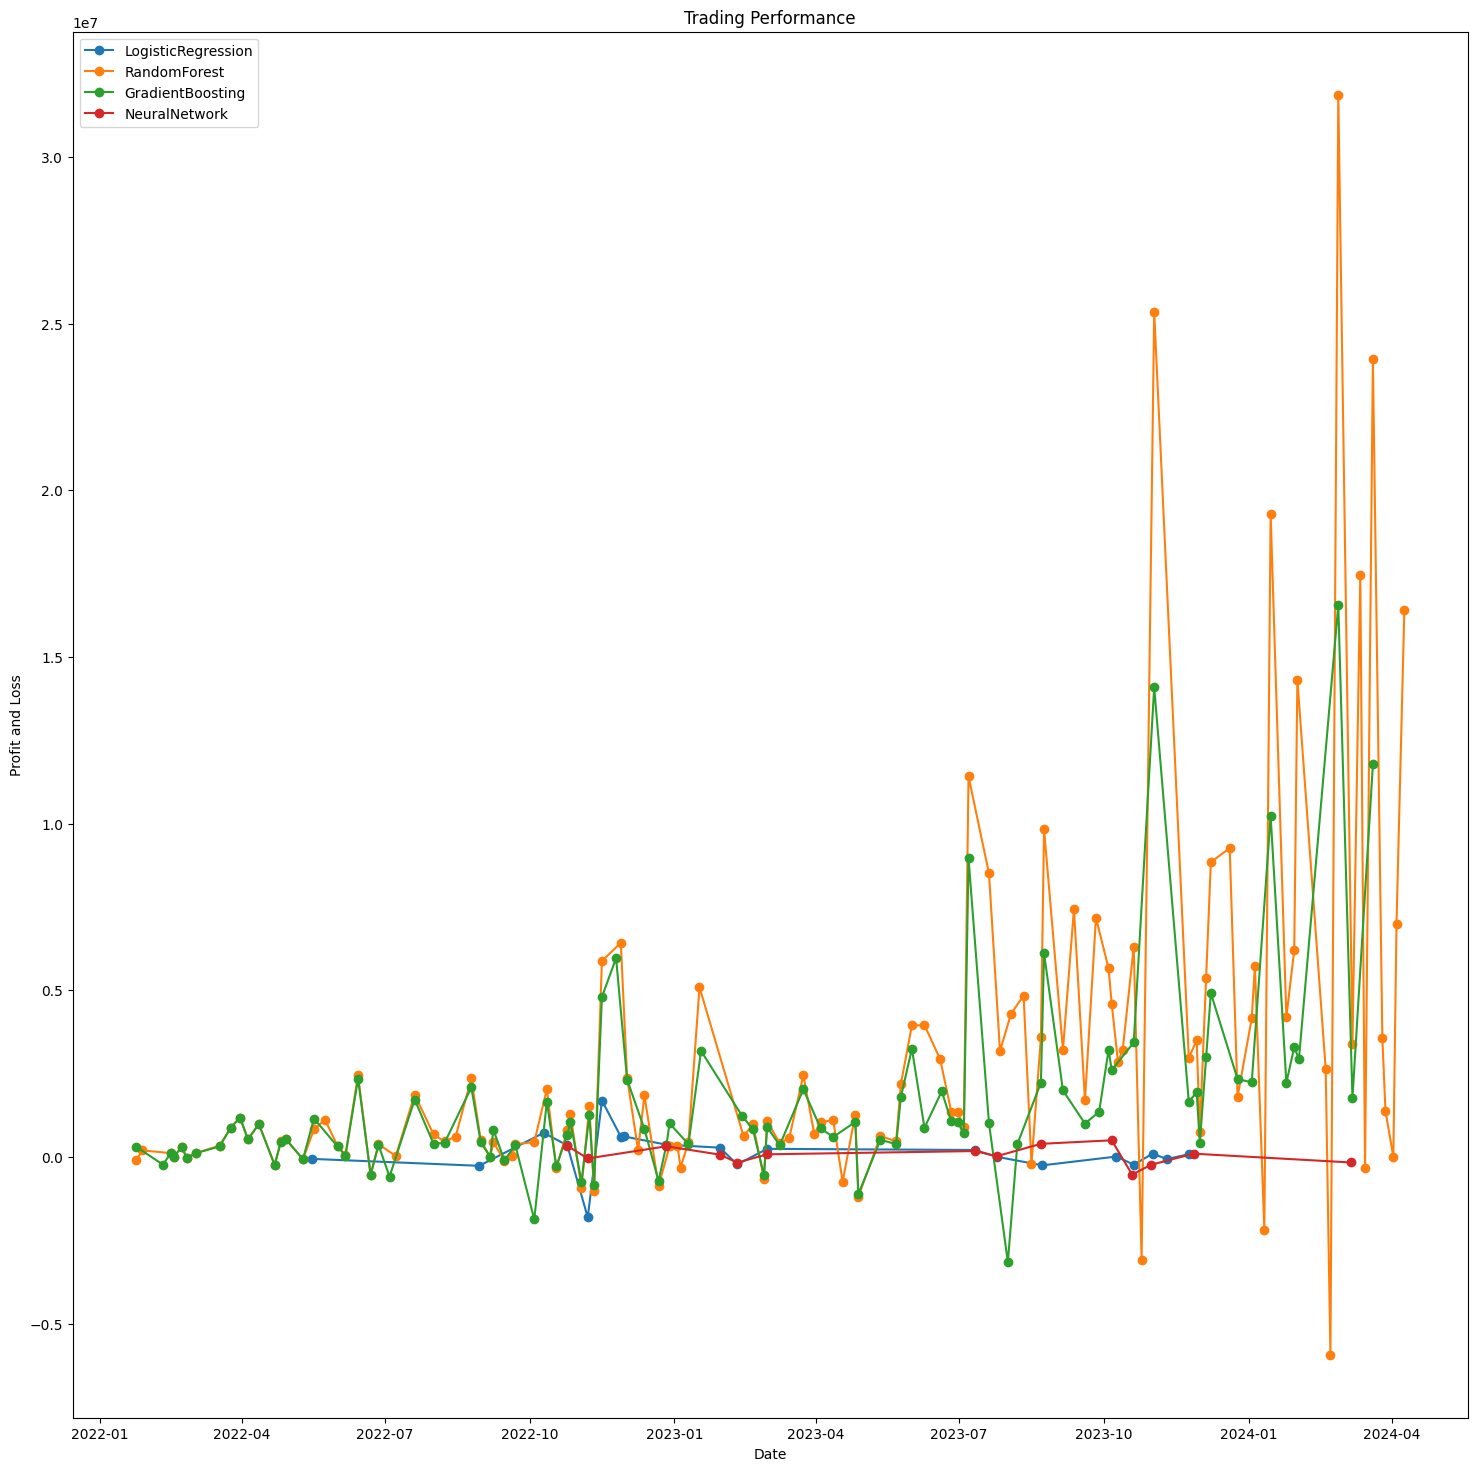

In [ ]:
# Lưu kết quả vào file
results_lr_df = results_lr['_trades']
results_lr_df.to_csv('lr_trading_results.csv')

results_rf_df = results_rf['_trades']
results_rf_df.to_csv('rf_trading_results.csv')

results_gb_df = results_gb['_trades']
results_gb_df.to_csv('gb_trading_results.csv')

results_nn_df = results_nn['_trades']
results_nn_df.to_csv('nn_trading_results.csv')

# Kiểm tra các cột trong DataFrame kết quả
print(results_lr_df.columns)
print(results_rf_df.columns)
print(results_gb_df.columns)
print(results_nn_df.columns)

# Giả sử các cột đúng là 'EntryTime' và 'PnL'
entry_time_col = 'EntryTime'
pnl_col = 'PnL'

# Tạo báo cáo
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
plt.plot(results_lr_df[entry_time_col], results_lr_df[pnl_col], label='LogisticRegression', marker='o')
plt.plot(results_rf_df[entry_time_col], results_rf_df[pnl_col], label='RandomForest', marker='o')
plt.plot(results_gb_df[entry_time_col], results_gb_df[pnl_col], label='GradientBoosting', marker='o')
plt.plot(results_nn_df[entry_time_col], results_nn_df[pnl_col], label='NeuralNetwork', marker='o')

plt.title('Trading Performance')
plt.xlabel('Date')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

# **Bổ sung thêm ngoài sách**

In [ ]:
import pandas as pd
import pandas_ta as ta
from vnstock import stock_historical_data
from datetime import datetime

# Ví dụ: Nhập cổ phiếu "VIC"
df = stock_historical_data(symbol="VIC", start_date="2023-01-01", end_date="2024-04-12", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d")
df = df[df['high'] != df['low']]
df.set_index("time", inplace=True)

# Đổi tên các cột cho đúng định dạng yêu cầu của backtesting library
df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})

# Thêm các chỉ báo kỹ thuật
df["EMA"] = ta.ema(df['Close'], length=12)
df["SMA"] = ta.sma(df['Close'], length=5)
my_bbands = ta.bbands(df['Close'], length=7, std=1.2)
df = df.join(my_bbands)

# Kiểm tra và loại bỏ giá trị null
df = df.dropna()

# Chuẩn bị dữ liệu
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df = df.dropna()

features = ['EMA', 'SMA', 'BBL_7_1.2', 'BBU_7_1.2']
X = df[features]
y = df['target']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Chuẩn bị dữ liệu cho LSTM
X_lstm = np.array(X_train_scaled).reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.array(X_test_scaled).reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Xây dựng mô hình LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
lstm_model.fit(X_lstm, y_train, epochs=50, batch_size=10, verbose=1)

# Đánh giá mô hình
X_test_lstm = np.array(X_test_scaled).reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
_, accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Model Accuracy: {accuracy}")


Epoch 1/50
25/25 [==============================] - 3s 3ms/step - loss: 0.6898 - accuracy: 0.5551
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5510
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5633
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5633
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5592
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5551
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5551
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.5551
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.5510
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.5592
Epoch 11/50
25/25 [

In [ ]:
# Dự đoán tín hiệu với LSTM
X_all_lstm = np.array(scaler.transform(X)).reshape((X.shape[0], 1, X.shape[1]))
lstm_predictions = (lstm_model.predict(X_all_lstm) > 0.5).astype(int)

# Đảm bảo chiều dài của dự đoán khớp với chiều dài của DataFrame
if len(lstm_predictions) != len(df):
    raise ValueError(f"Length of predictions ({len(lstm_predictions)}) does not match length of DataFrame ({len(df)})")

df['lstm_prediction'] = lstm_predictions

# Kiểm tra lại chiều dài của dự đoán
print(f"Length of predictions: {len(df['lstm_prediction'])}")
print(f"Length of DataFrame: {len(df)}")


10/10 [==============================] - 1s 4ms/step
Length of predictions: 307
Length of DataFrame: 307


In [ ]:
from backtesting import Strategy, Backtest

class LSTM_Strategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.lstm_prediction, name='lstm_signal')

    def next(self):
        if self.signal[-1] == 1:
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0 and self.position:
            self.position.close()

bt_lstm = Backtest(df, LSTM_Strategy, cash=10000000)
results_lstm = bt_lstm.run()
print(results_lstm)
bt_lstm.plot()


Start                     2023-01-18 00:00:00
End                       2024-04-12 00:00:00
Duration                    450 days 00:00:00
Exposure Time [%]                    30.29316
Equity Final [$]                   10947550.0
Equity Peak [$]                    11071600.0
Return [%]                             9.4755
Buy & Hold Return [%]              -14.550265
Return (Ann.) [%]                    7.714256
Volatility (Ann.) [%]               17.908793
Sharpe Ratio                         0.430752
Sortino Ratio                        0.672662
Calmar Ratio                         0.802994
Max. Drawdown [%]                   -9.606867
Avg. Drawdown [%]                   -5.621894
Max. Drawdown Duration       96 days 00:00:00
Avg. Drawdown Duration       36 days 00:00:00
# Trades                                    2
Win Rate [%]                            100.0
Best Trade [%]                       5.762712
Worst Trade [%]                      3.538813
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p6848', ...)

In [ ]:
from sklearn.svm import SVC

# Xây dựng mô hình SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
print(f"SVM Model Accuracy: {svm_model.score(X_test_scaled, y_test)}")

# Dự đoán tín hiệu với SVM
df['svm_prediction'] = svm_model.predict(scaler.transform(X))

# Xử lý các nhãn trùng lặp
duplicate_labels = df.index.duplicated()
if duplicate_labels.any():
    df = df[~duplicate_labels]

# Xây dựng chiến lược giao dịch dựa trên tín hiệu dự đoán của SVM
from backtesting import Strategy, Backtest

class SVM_Strategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.svm_prediction, name='svm_signal')

    def next(self):
        if self.signal[-1] == 1:
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0 and self.position:
            self.position.close()

bt_svm = Backtest(df, SVM_Strategy, cash=10000000)
results_svm = bt_svm.run()
print(results_svm)
bt_svm.plot()


SVM Model Accuracy: 0.5645161290322581
Start                     2023-01-18 00:00:00
End                       2024-04-12 00:00:00
Duration                    450 days 00:00:00
Exposure Time [%]                   28.338762
Equity Final [$]                   13415300.0
Equity Peak [$]                    13415300.0
Return [%]                             34.153
Buy & Hold Return [%]              -14.550265
Return (Ann.) [%]                   27.274203
Volatility (Ann.) [%]               21.472624
Sharpe Ratio                         1.270185
Sortino Ratio                        3.115445
Calmar Ratio                         2.835854
Max. Drawdown [%]                   -9.617634
Avg. Drawdown [%]                   -4.172147
Max. Drawdown Duration       62 days 00:00:00
Avg. Drawdown Duration       25 days 00:00:00
# Trades                                    4
Win Rate [%]                             75.0
Best Trade [%]                      14.027149
Worst Trade [%]                     -0.30

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p7228', ...)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Xây dựng mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
print(f"KNN Model Accuracy: {knn_model.score(X_test_scaled, y_test)}")

# Dự đoán tín hiệu với KNN
df['knn_prediction'] = knn_model.predict(scaler.transform(X))

# Xử lý các nhãn trùng lặp
duplicate_labels = df.index.duplicated()
if duplicate_labels.any():
    df = df[~duplicate_labels]

# Xây dựng chiến lược giao dịch dựa trên tín hiệu dự đoán của KNN
class KNN_Strategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.knn_prediction, name='knn_signal')

    def next(self):
        if self.signal[-1] == 1:
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0 and self.position:
            self.position.close()

bt_knn = Backtest(df, KNN_Strategy, cash=10000000)
results_knn = bt_knn.run()
print(results_knn)
bt_knn.plot()


KNN Model Accuracy: 0.532258064516129
Start                     2023-01-18 00:00:00
End                       2024-04-12 00:00:00
Duration                    450 days 00:00:00
Exposure Time [%]                   49.837134
Equity Final [$]                   15907250.0
Equity Peak [$]                    15907250.0
Return [%]                            59.0725
Buy & Hold Return [%]              -14.550265
Return (Ann.) [%]                   46.378981
Volatility (Ann.) [%]               32.612277
Sharpe Ratio                         1.422133
Sortino Ratio                        3.597531
Calmar Ratio                         4.000412
Max. Drawdown [%]                  -11.593552
Avg. Drawdown [%]                   -2.754317
Max. Drawdown Duration       78 days 00:00:00
Avg. Drawdown Duration       20 days 00:00:00
# Trades                                   32
Win Rate [%]                            56.25
Best Trade [%]                      13.350126
Worst Trade [%]                     -9.513

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p7608', ...)

In [ ]:
import xgboost as xgb

# Xây dựng mô hình XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
print(f"XGBoost Model Accuracy: {xgb_model.score(X_test_scaled, y_test)}")

# Dự đoán tín hiệu với XGBoost
df['xgb_prediction'] = xgb_model.predict(scaler.transform(X))

# Xử lý các nhãn trùng lặp
duplicate_labels = df.index.duplicated()
if duplicate_labels.any():
    df = df[~duplicate_labels]

# Xây dựng chiến lược giao dịch dựa trên tín hiệu dự đoán của XGBoost
class XGB_Strategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.xgb_prediction, name='xgb_signal')

    def next(self):
        if self.signal[-1] == 1:
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0 and self.position:
            self.position.close()

bt_xgb = Backtest(df, XGB_Strategy, cash=10000000)
results_xgb = bt_xgb.run()
print(results_xgb)
bt_xgb.plot()


XGBoost Model Accuracy: 0.5483870967741935
Start                     2023-01-18 00:00:00
End                       2024-04-12 00:00:00
Duration                    450 days 00:00:00
Exposure Time [%]                   62.540717
Equity Final [$]                   29513050.0
Equity Peak [$]                    29704000.0
Return [%]                           195.1305
Buy & Hold Return [%]              -14.550265
Return (Ann.) [%]                  143.113801
Volatility (Ann.) [%]               54.030849
Sharpe Ratio                         2.648742
Sortino Ratio                       14.585471
Calmar Ratio                        18.381466
Max. Drawdown [%]                   -7.785767
Avg. Drawdown [%]                   -1.995895
Max. Drawdown Duration       53 days 00:00:00
Avg. Drawdown Duration       15 days 00:00:00
# Trades                                   60
Win Rate [%]                             70.0
Best Trade [%]                      15.686275
Worst Trade [%]                     -

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p7988', ...)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Chuẩn bị dữ liệu cho LSTM
X_lstm = np.array(X_train_scaled).reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.array(X_test_scaled).reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Xây dựng mô hình LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
lstm_model.fit(X_lstm, y_train, epochs=50, batch_size=10, verbose=1)

# Đánh giá mô hình
X_test_lstm = np.array(X_test_scaled).reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
_, accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Model Accuracy: {accuracy}")

# Dự đoán tín hiệu với LSTM
X_all_lstm = np.array(scaler.transform(X)).reshape((X.shape[0], 1, X.shape[1]))
lstm_predictions = (lstm_model.predict(X_all_lstm) > 0.5).astype(int)

# Đảm bảo chiều dài của dự đoán khớp với chiều dài của DataFrame
if len(lstm_predictions) != len(df):
    raise ValueError(f"Length of predictions ({len(lstm_predictions)}) does not match length of DataFrame ({len(df)})")

df['lstm_prediction'] = lstm_predictions

# Xây dựng chiến lược giao dịch dựa trên tín hiệu dự đoán của LSTM
class LSTM_Strategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.lstm_prediction, name='lstm_signal')

    def next(self):
        if self.signal[-1] == 1:
            if not self.position:
                self.buy()
        elif self.signal[-1] == 0 and self.position:
            self.position.close()

bt_lstm = Backtest(df, LSTM_Strategy, cash=10000000)
results_lstm = bt_lstm.run()
print(results_lstm)
bt_lstm.plot()


Epoch 1/50
25/25 [==============================] - 9s 7ms/step - loss: 0.6928 - accuracy: 0.5265
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.5388
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6864 - accuracy: 0.5755
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6850 - accuracy: 0.5633
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.6854 - accuracy: 0.5633
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6852 - accuracy: 0.5633
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.5633
Epoch 8/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6829 - accuracy: 0.5633
Epoch 9/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6817 - accuracy: 0.5633
Epoch 10/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6808 - accuracy: 0.5510
Epoch 11/50
25/25 [

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p8368', ...)

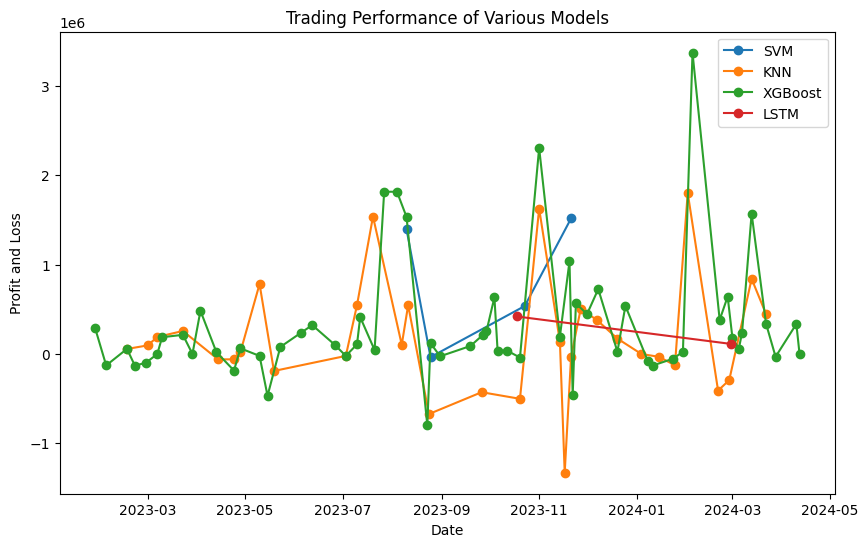

In [ ]:
# Lưu kết quả vào file
results_svm_df = results_svm['_trades']
results_svm_df.to_csv('svm_trading_results.csv')

results_knn_df = results_knn['_trades']
results_knn_df.to_csv('knn_trading_results.csv')

results_xgb_df = results_xgb['_trades']
results_xgb_df.to_csv('xgb_trading_results.csv')

results_lstm_df = results_lstm['_trades']
results_lstm_df.to_csv('lstm_trading_results.csv')

# Giả sử các cột đúng là 'EntryTime' và 'PnL'
entry_time_col = 'EntryTime'
pnl_col = 'PnL'

# Tạo báo cáo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_svm_df[entry_time_col], results_svm_df[pnl_col], label='SVM', marker='o')
plt.plot(results_knn_df[entry_time_col], results_knn_df[pnl_col], label='KNN', marker='o')
plt.plot(results_xgb_df[entry_time_col], results_xgb_df[pnl_col], label='XGBoost', marker='o')
plt.plot(results_lstm_df[entry_time_col], results_lstm_df[pnl_col], label='LSTM', marker='o')

plt.title('Trading Performance of Various Models')
plt.xlabel('Date')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()


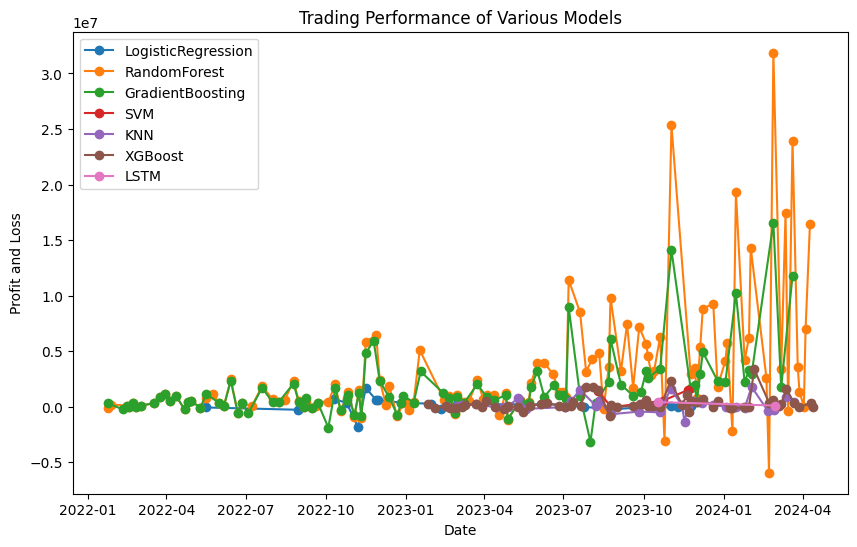

In [ ]:
# Lưu kết quả vào file
results_lr_df = results_lr['_trades']
results_lr_df.to_csv('lr_trading_results.csv')

results_rf_df = results_rf['_trades']
results_rf_df.to_csv('rf_trading_results.csv')

results_gb_df = results_gb['_trades']
results_gb_df.to_csv('gb_trading_results.csv')

results_svm_df = results_svm['_trades']
results_svm_df.to_csv('svm_trading_results.csv')

results_knn_df = results_knn['_trades']
results_knn_df.to_csv('knn_trading_results.csv')

results_xgb_df = results_xgb['_trades']
results_xgb_df.to_csv('xgb_trading_results.csv')

results_lstm_df = results_lstm['_trades']
results_lstm_df.to_csv('lstm_trading_results.csv')

# Giả sử các cột đúng là 'EntryTime' và 'PnL'
entry_time_col = 'EntryTime'
pnl_col = 'PnL'

# Tạo báo cáo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_lr_df[entry_time_col], results_lr_df[pnl_col], label='LogisticRegression', marker='o')
plt.plot(results_rf_df[entry_time_col], results_rf_df[pnl_col], label='RandomForest', marker='o')
plt.plot(results_gb_df[entry_time_col], results_gb_df[pnl_col], label='GradientBoosting', marker='o')
plt.plot(results_svm_df[entry_time_col], results_svm_df[pnl_col], label='SVM', marker='o')
plt.plot(results_knn_df[entry_time_col], results_knn_df[pnl_col], label='KNN', marker='o')
plt.plot(results_xgb_df[entry_time_col], results_xgb_df[pnl_col], label='XGBoost', marker='o')
plt.plot(results_lstm_df[entry_time_col], results_lstm_df[pnl_col], label='LSTM', marker='o')

plt.title('Trading Performance of Various Models')
plt.xlabel('Date')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()
